# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [2]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.20.0


### Creating data to view and fit

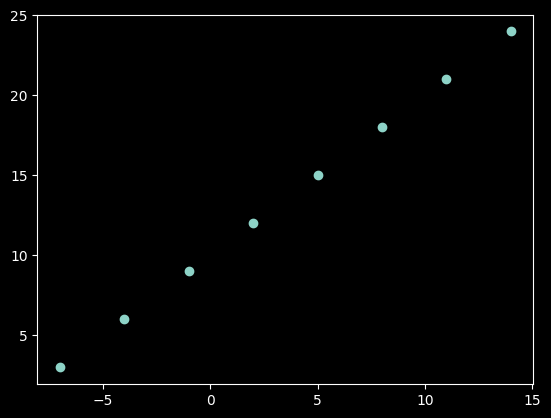

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X = tf.cast(X, dtype= tf.float32)
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y = tf.cast(y, dtype= tf.float32)

# Visualize it
plt.scatter(X,y)

In [4]:
y == X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

In [5]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [7]:
X[1], y[1]


(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [9]:
X[0].ndim

0

In [10]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape #type:ignore
output_shape = y[0].shape #type:ignore
input_shape, output_shape

(TensorShape([]), TensorShape([]))

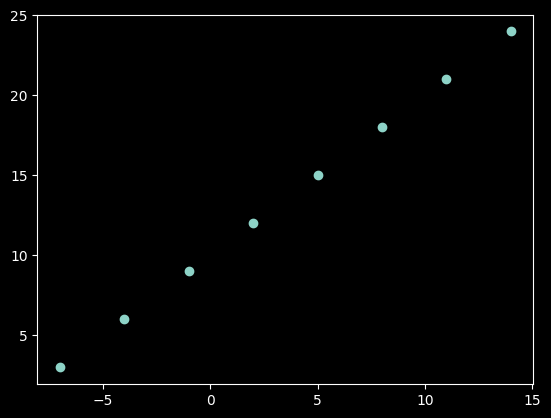

In [12]:
plt.scatter(X,y) #type:ignore

## Steps in modeling with TensorFlow

1. **Creating a model**
    - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**
    - define the loss function (in other words the function which tells our model how wrong it is)
    - define the optimizer (tells our model how to improve the patterns its learning)
    - define the metrics (what we can use to interpret the performance of our model )
3. **Fitting a model**
    - letting the model try to find patterns between X and Y (features and labels)

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -> mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - loss: 13.7251 - mae: 13.7251


In [14]:
# Checkout x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
predict = tf.constant([17.0])
y_pred = model.predict(predict)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[-0.48846582]], dtype=float32)

### Improving our model
We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the numbers of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [16]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.050),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step - loss: 12.8854 - mae: 12.8854
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.8801 - mae: 5.8801
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.1524 - mae: 4.1524
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.9110 - mae: 3.9110
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.6856 - mae: 4.6856
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.7964 - mae: 3.7964
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.7426 - mae: 3.7426
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.2422 - mae: 3.2422
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1571 - mae: 3.1571
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.5923 - mae: 3.5923
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.3482 - mae: 2.3482
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.6369 - mae: 3.6369
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/

In [17]:
#remind ourselves the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's prediction has improved...
predict = tf.constant([17.0])
model.predict(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[26.341026]], dtype=float32)

In [19]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 12.9599 - mae: 12.9599
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.3127 - mae: 12.3127
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.6649 - mae: 11.6649
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.0123 - mae: 11.0123
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.3517 - mae: 10.3517
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.6809 - mae: 9.6809
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.9976 - mae: 8.9976
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.2991 - mae: 8.2991
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.5822 - mae: 7.5822
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.8441 - mae: 6.8441
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.7576 - mae: 6.7576
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.1053 - mae: 7.1053
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
prd = tf.constant([17])
model.predict(prd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[27.182972]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll through when building neural networks is:


`Build a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it...`



## When it comes evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize,"

### It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does it look like?
* The training of a model - how does a model preform while it learns?
* The predictions of the model - how do the predictions of a model line up against the grand truth (the original labels) ?

In [22]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

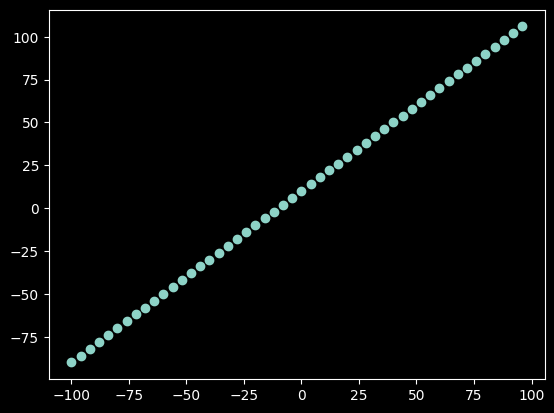

In [24]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...


* **Training set** - the model learns from this data, which is
typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is
typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test
what is has learned, this set is typically 10-15% of the total
data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data
Now we're got our data in training and test sets... let's visualize it again

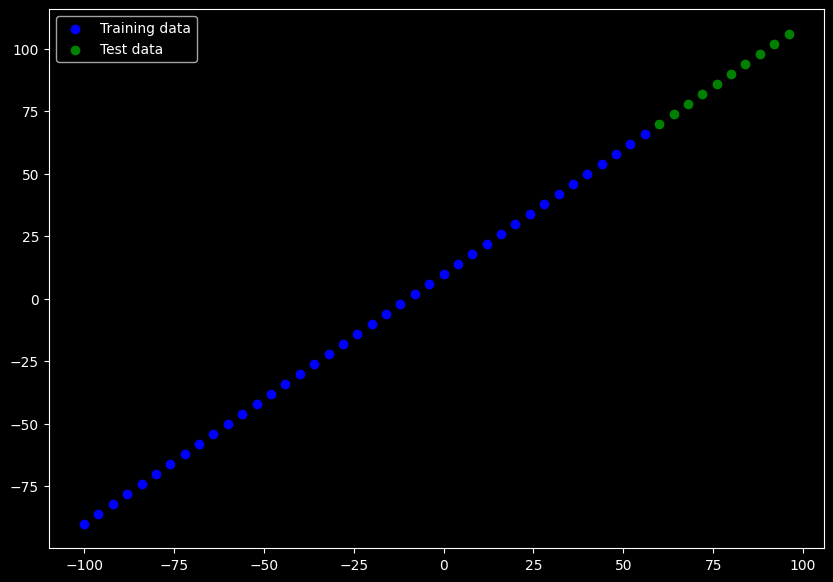

In [27]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label= "Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label= "Test data")
plt.legend()

In [28]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

## Fit the model.
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [73]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],
    name="model_1")

# Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [74]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns)
the model can update as it trains.
* Non-trainable params - these parameters aren't updated
during training (this is typical when you bring in already
learn patterns or parameters from other models during
**transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable
parameters within a layer, check out MIT's introduction to
deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [75]:
# Let's fit our model to the training data
expanded_X = tf.expand_dims(X_train, axis = -1)
model.fit(x=expanded_X, y=y_train, epochs=100, verbose=0)


In [76]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

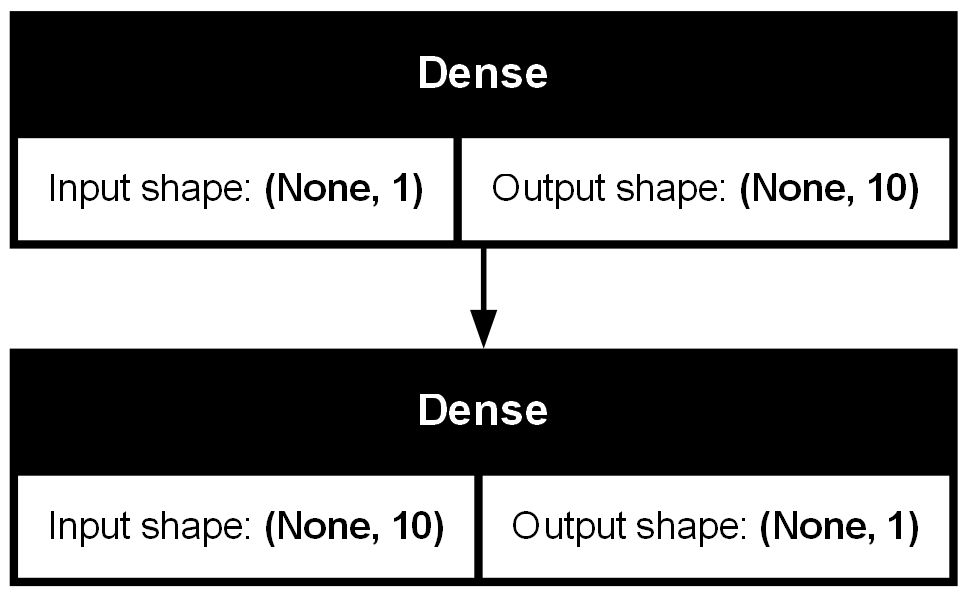

In [77]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)